<a href="https://colab.research.google.com/github/TiagoBem/PredictionModel/blob/main/LSTM_Funcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Bidirectional, Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


dataset = pd.read_csv('FinalDatasetWithPrevious.csv')
dataset = dataset.dropna()
dataset = dataset.loc[:,~dataset.columns.str.match("Unnamed")]
print(dataset)

Q1 = dataset['DL_bitrate'].quantile(0.25)
Q3 = dataset['DL_bitrate'].quantile(0.75)
nineth = dataset['DL_bitrate'].quantile(0.9)
media = dataset['DL_bitrate'].mean()
IQR = Q3 - Q1
filter = (dataset['DL_bitrate'] >= Q1 - 1.5 * nineth) | (dataset['DL_bitrate'] <= Q3 + 1.5 * nineth)
dataset = dataset.loc[filter]  

Y = dataset['DL_bitrate']
X = dataset.drop(['DL_bitrate'], axis = 1)

scaler = MinMaxScaler(feature_range=(0,1))

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0)
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)
train_Y = scaler.fit_transform(train_Y.to_numpy().reshape(-1,1))
test_Y = scaler.fit_transform(test_Y.to_numpy().reshape(-1,1))

# LSTM

test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
print(train_X.shape[1])

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

import timeit
start = timeit.default_timer()
history = model.fit(train_X, train_Y, epochs=100, batch_size=64, validation_data=(test_X, test_Y), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
stop = timeit.default_timer()
print('Fit Time: ', stop - start)


model.summary()

#early_stop = EarlyStopping(monitor='val_loss', patience=10)
#print(train_X.to_numpy())
#train_X = train_X.reshape(len(train_X), len(train_X[0]),1)
#train_Y = train_Y.reshape(len(train_Y), 1,1)

print(train_X.shape)
print(train_Y.shape)

#model.compile(optimizer='adam', loss='mse')
#history = model.fit(train_X, train_Y, epochs=1000, validation_split=0.2, verbose=1, callbacks=early_stop)
#model.summary()

model.save('lstm.h5')


       Hours  Weekday  Month  ...  DL_bitrate_N-4  UL_bitrate_N-4  UL_bitrate
4         10        2      1  ...         18285.0           328.0         457
5         10        2      1  ...         26148.0           574.0         399
6         10        2      1  ...         26058.0           806.0         265
7         10        2      1  ...         24302.0           455.0         330
8         10        2      1  ...         24079.0           457.0         411
...      ...      ...    ...  ...             ...             ...         ...
75869     15        3     12  ...          5256.0            95.0         164
75870     15        3     12  ...          6190.0           223.0         165
75871     15        3     12  ...          7515.0           130.0         170
75872     15        3     12  ...          9107.0           159.0         176
75873     15        3     12  ...          7694.0           164.0         116

[75775 rows x 28 columns]
1
Epoch 1/100
829/829 [==============

(22733, 1, 27)
Prediction Time:  0.5671344800000497
Mean Absolute Error: 0.011
Mean Squared Error: 0.000
Root Mean Squared Error: 0.021
R2 score:  0.96
         ARE Values
count  22733.000000
mean      56.146097
std      974.027049
min        0.000000
25%        4.153802
50%       10.296366
75%       23.324468
max    88114.796875


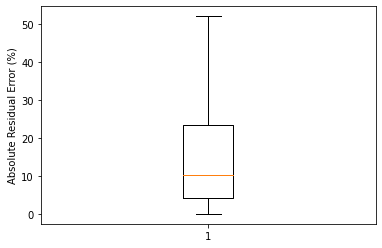

'\nsem summarization\nMean Absolute Error: 0.010853136406426064\nMean Squared Error: 0.0004271267432290042\nRoot Mean Squared Error: 0.020667044859606905\nR2 score:  0.96\n         ARE Values\ncount  22733.000000\nmean      54.317809\nstd      841.757336\nmin        0.000000\n25%        4.102195\n50%       10.687126\n75%       23.840681\nmax    68060.218750\n\n90th summarization\nMean Absolute Error: 0.011564346208875887\nMean Squared Error: 0.0004378044468907094\nRoot Mean Squared Error: 0.020923777070374017\nR2 score:  0.96\n          ARE Values\ncount   22733.000000\nmean      123.661490\nstd      1251.850898\nmin         0.000000\n25%         4.247884\n50%        10.737458\n75%        25.293802\nmax    108048.453125\n\nmean summarization\nMean Absolute Error: 0.011142914223734791\nMean Squared Error: 0.00042374912613098723\nRoot Mean Squared Error: 0.020585167624554025\nR2 score:  0.96\n         ARE Values\ncount   22733.000000\nmean      134.931405\nstd      1256.447272\nmin      

In [ ]:
print(test_X.shape)
#test_X = test_X.to_numpy().reshape(len(test_X), len(test_X.to_numpy()[0]),1)
#print(test_X)
#test_X = test_X.reshape(len(test_X), len(test_X[0]),1)
start = timeit.default_timer()
result = model.predict(test_X)
stop = timeit.default_timer()
print('Prediction Time: ', stop - start) 

#result = pd.DataFrame(result.reshape(len(result),27))[26]
#result = scaler.inverse_transform(result.reshape(-1,1))
#test_Y = scaler.inverse_transform(test_Y.reshape(-1,1))
#print(result)
#print("----------")
#print(test_Y)

import matplotlib.pyplot as plt


def mean_absolute_percentage_error(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()

def absolute_residual_error(a, b):
  total = np.array([])
  for i in range(len(a)):
    res = (np.fabs( max(a[i], 10) - max(b[i], 10))) / (max(a[i], 10))
    total = np.append(total, res * 100)
  return total


# evaluation
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(test_Y, result))
#print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(test_y, RF_predictions))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(test_Y, result))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(test_Y, result)))
print("R2 score: ", round(metrics.r2_score(test_Y, result), 2))

eval_true = scaler.inverse_transform(test_Y)
eval_pred = scaler.inverse_transform(result)
are = absolute_residual_error(eval_true, eval_pred)
df = pd.DataFrame(are, columns=['ARE Values'])
print(df.describe())

plt.boxplot(df.to_numpy(), showfliers=False)
plt.ylabel('Absolute Residual Error (%)')
plt.show()

np.save("nineth_lstm.npy", df.to_numpy())

'''
sem summarization
Mean Absolute Error: 0.010853136406426064
Mean Squared Error: 0.0004271267432290042
Root Mean Squared Error: 0.020667044859606905
R2 score:  0.96
         ARE Values
count  22733.000000
mean      54.317809
std      841.757336
min        0.000000
25%        4.102195
50%       10.687126
75%       23.840681
max    68060.218750

90th summarization
Mean Absolute Error: 0.011564346208875887
Mean Squared Error: 0.0004378044468907094
Root Mean Squared Error: 0.020923777070374017
R2 score:  0.96
          ARE Values
count   22733.000000
mean      123.661490
std      1251.850898
min         0.000000
25%         4.247884
50%        10.737458
75%        25.293802
max    108048.453125

mean summarization
Mean Absolute Error: 0.011142914223734791
Mean Squared Error: 0.00042374912613098723
Root Mean Squared Error: 0.020585167624554025
R2 score:  0.96
         ARE Values
count   22733.000000
mean      134.931405
std      1256.447272
min         0.000000
25%         4.100067
50%        10.256133
75%        24.240894
max    102564.773438

IQR
Mean Absolute Error: 0.011617128200695685
Mean Squared Error: 0.00042324458995072627
Root Mean Squared Error: 0.02057290912707112
R2 score:  0.96
         ARE Values
count  22733.000000
mean      42.731647
std      770.943772
min        0.000000
25%        5.049363
50%       11.207078
75%       24.704036
max    75154.195312
'''

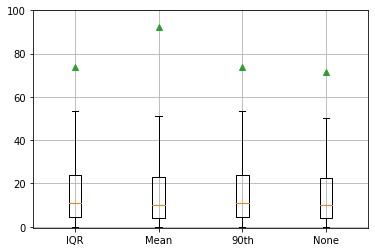

In [ ]:
data_IQR = np.load("iqr_lstm.npy")
data_mean = np.load("mean_lstm.npy")
data_nineth = np.load("nineth_lstm.npy")
data_without = np.load("without_lstm.npy")

plt.boxplot(data_IQR, positions = [1], showfliers=False, showmeans=True)
plt.boxplot(data_mean, positions = [2], showfliers=False, showmeans=True)
plt.boxplot(data_nineth, positions = [3], showfliers=False, showmeans=True)
plt.boxplot(data_without, positions = [4], showfliers=False, showmeans=True)
plt.xticks([1,2,3,4],["IQR","Mean","90th","None"])
plt.ylim([-0.5,100])
plt.grid()
plt.show()


{'loss': [0.0012160263722762465, 0.0005960628623142838, 0.0005692005506716669, 0.0005473556811921299, 0.0005360443028621376, 0.000524403527379036, 0.0005136223044246435, 0.0005048325401730835, 0.0005001236568205059, 0.0004934763419441879, 0.00048580887960270047, 0.00047979174996726215, 0.00047967222053557634, 0.00046918855514377356, 0.00047043481026776135, 0.0004632144409697503, 0.00046048048534430563, 0.00045940183917991817, 0.0004585868737194687, 0.0004537065397016704, 0.0004516933695413172, 0.00045019001117907465, 0.0004470132989808917, 0.00044708760106004775, 0.00044408193207345903, 0.0004474643792491406, 0.0004425398074090481, 0.00044494104804471135, 0.00044068487477488816, 0.00044189803884364665, 0.0004361393803264946, 0.0004354703123681247, 0.0004391794209368527], 'val_loss': [0.0005971151404082775, 0.000554937229026109, 0.0005321048083715141, 0.0004848777607548982, 0.0004925029934383929, 0.000487605546368286, 0.0004985413397662342, 0.0004741630400530994, 0.0004799538291990757, 

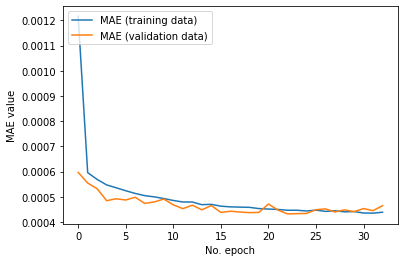

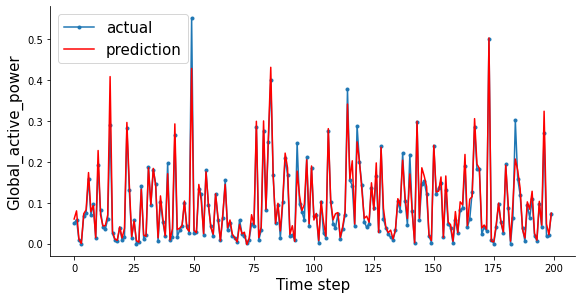

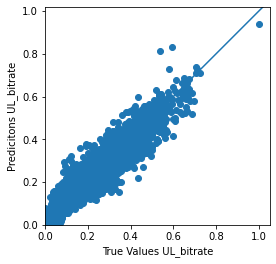

In [ ]:
print(history.history)

import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, test_Y[:200], marker='.', label="actual")
plt.plot(aa, result[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();


plt.scatter(test_Y, result)
plt.xlabel('True Values UL_bitrate')
plt.ylabel('Predicitons UL_bitrate')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [ ]:
'''
result = scaler.inverse_transform(result.reshape(-1,1))
test_Y = scaler.inverse_transform(test_Y.reshape(-1,1))
print(result)
print("----------")
print(test_Y)
'''

print("----------------------------------------")
print("predict first line")

#predict first line
print(test_X[0].shape)
first = test_X[0]
#first = scaler.inverse_transform(first)
first = first.reshape(1,1,len(test_X[0][0]))

test_Y0 = scaler.inverse_transform(test_Y)

print(first)
first_res = model.predict(first)
first_res = scaler.inverse_transform(first_res)
print("expected: ", test_Y0[0])
print("predicted:", first_res)

----------------------------------------
predict first line
(1, 27)
[[[0.58333333 0.6        0.         0.         0.5        0.37037037
   0.         0.45121951 0.47619048 0.07795403 0.04488778 0.
   0.45121951 0.47619048 0.06267    0.05007728 0.         0.41463415
   0.47619048 0.04750424 0.02417425 0.         0.41463415 0.47619048
   0.03598324 0.01986596 0.02777778]]]
expected:  [7269.]
predicted: [[8853.862]]
